In [28]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap


# Import API key
#from api_keys import weather_api_key

In [29]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
crashes_df = pd.read_csv("data/nyc_mv_crash_data_truncated4.csv")


# Display sample data
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,2.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,1.0,0.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/2022,6:55,NaN,NaN,NaN,0.0,0.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9/8/2016,14:00,BRONX,40.820297,-73.854645,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048571,8/23/2016,16:55,NaN,40.692722,-73.968750,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048572,9/11/2016,14:45,NaN,40.733430,-73.868890,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048573,9/9/2016,17:00,NaN,40.770065,-73.959274,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [30]:
cols_to_check = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']

crashes_df.dropna(subset=cols_to_check, inplace=True)

crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,2.0,0.0,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048563,9/10/2016,18:39,MANHATTAN,40.746490,-74.001335,0.0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
1048564,8/22/2016,15:30,QUEENS,40.665504,-73.856120,0.0,0.0,Convertible,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048566,8/29/2016,13:45,QUEENS,40.686516,-73.846540,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
1048568,9/10/2016,11:00,QUEENS,40.680490,-73.774704,1.0,0.0,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


In [31]:
crashes_df['NUMBER OF VEHICLES'] = crashes_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
crashes_df.drop(columns=['NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
crashes_df.head(500)

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,1
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,0.0,2
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,0.0,1
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,0.0,2
...,...,...,...,...,...,...,...
784,4/16/2021,15:45,BROOKLYN,40.731422,-73.946410,0.0,2
785,4/15/2021,8:20,MANHATTAN,40.761234,-73.963890,0.0,1
786,4/10/2021,19:09,BROOKLYN,40.668976,-73.906680,0.0,2
788,4/15/2021,18:20,BROOKLYN,40.637276,-73.931770,0.0,2


In [32]:
fatality_df = crashes_df[crashes_df['NUMBER OF PERSONS KILLED']>0]

fatality_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
591,4/15/2021,15:18,BROOKLYN,40.620487,-74.029305,1.0,1
1350,7/8/2021,22:03,MANHATTAN,40.721474,-73.983830,1.0,2
2346,8/27/2021,9:15,MANHATTAN,40.805740,-73.942764,1.0,1
2437,9/11/2021,18:18,BROOKLYN,40.684204,-73.968060,1.0,2
2607,4/8/2021,19:55,BRONX,40.830307,-73.898730,1.0,1
...,...,...,...,...,...,...,...
1031260,10/7/2016,14:47,MANHATTAN,0.000000,0.000000,1.0,1
1032436,10/4/2016,9:49,MANHATTAN,40.719933,-73.978760,1.0,1
1035830,9/30/2016,12:16,STATEN ISLAND,40.626663,-74.075650,1.0,1
1037943,9/13/2016,19:41,MANHATTAN,40.810684,-73.954520,1.0,1


In [33]:
brooklyn_df = fatality_df[fatality_df['BOROUGH'] == 'BROOKLYN']
brooklyn_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
591,4/15/2021,15:18,BROOKLYN,40.620487,-74.029305,1.0,1
2437,9/11/2021,18:18,BROOKLYN,40.684204,-73.968060,1.0,2
5831,4/24/2021,3:43,BROOKLYN,40.643063,-73.951660,1.0,2
7075,8/24/2021,21:23,BROOKLYN,40.675716,-73.914200,1.0,1
8480,4/19/2021,8:39,BROOKLYN,40.614240,-73.988240,1.0,1
...,...,...,...,...,...,...,...
983864,12/9/2016,8:30,BROOKLYN,40.679466,-73.900370,1.0,4
984445,12/19/2016,22:21,BROOKLYN,40.602688,-73.933556,1.0,1
986721,11/19/2016,15:45,BROOKLYN,40.591106,-73.965130,1.0,2
997656,11/13/2016,17:15,BROOKLYN,40.684147,-73.922966,1.0,0


In [34]:
bronx_df = fatality_df[fatality_df['BOROUGH'] == 'BRONX']
bronx_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
2607,4/8/2021,19:55,BRONX,40.830307,-73.898730,1.0,1
4137,12/16/2021,0:15,BRONX,40.849550,-73.853050,2.0,1
15476,6/29/2022,23:54,BRONX,40.814266,-73.912964,1.0,2
24793,10/27/2021,20:22,BRONX,40.861404,-73.870590,1.0,1
29258,10/2/2021,2:46,BRONX,40.844970,-73.902470,1.0,1
...,...,...,...,...,...,...,...
995716,11/8/2016,16:00,BRONX,40.809105,-73.922900,1.0,1
1000350,11/21/2016,17:35,BRONX,40.866047,-73.882744,1.0,1
1014606,10/18/2016,16:20,BRONX,40.836346,-73.852220,1.0,1
1016569,10/10/2016,21:36,BRONX,40.825200,-73.914760,1.0,0


In [35]:
manhattan_df = fatality_df[fatality_df['BOROUGH'] == 'MANHATTAN']
manhattan_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
1350,7/8/2021,22:03,MANHATTAN,40.721474,-73.983830,1.0,2
2346,8/27/2021,9:15,MANHATTAN,40.805740,-73.942764,1.0,1
2906,4/19/2021,19:13,MANHATTAN,40.822890,-73.942080,1.0,1
10883,3/30/2021,13:09,MANHATTAN,40.774370,-73.963554,1.0,1
11450,9/19/2021,23:17,MANHATTAN,40.751892,-73.967600,1.0,2
...,...,...,...,...,...,...,...
1027224,9/17/2016,10:41,MANHATTAN,40.769060,-73.961105,1.0,1
1027799,9/28/2016,19:40,MANHATTAN,40.797306,-73.934460,1.0,1
1031260,10/7/2016,14:47,MANHATTAN,0.000000,0.000000,1.0,1
1032436,10/4/2016,9:49,MANHATTAN,40.719933,-73.978760,1.0,1


In [36]:
staten_df = fatality_df[fatality_df['BOROUGH'] == 'STATEN ISLAND']
staten_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
3042,12/17/2021,23:50,STATEN ISLAND,40.547924,-74.166954,1.0,1
19612,5/6/2021,14:02,STATEN ISLAND,40.505527,-74.238190,1.0,2
70165,7/29/2021,10:25,STATEN ISLAND,40.618160,-74.084920,1.0,1
118113,7/10/2022,20:47,STATEN ISLAND,40.508614,-74.223750,3.0,2
133211,5/26/2022,7:05,STATEN ISLAND,40.613373,-74.063255,1.0,1
166865,3/5/2021,6:38,STATEN ISLAND,40.593250,-74.110650,1.0,1
170679,1/13/2021,13:05,STATEN ISLAND,40.626663,-74.075650,1.0,1
179535,1/29/2021,7:46,STATEN ISLAND,40.603615,-74.069310,1.0,1
196262,11/30/2020,22:06,STATEN ISLAND,40.566494,-74.113770,1.0,1
202408,10/15/2020,9:46,STATEN ISLAND,40.590750,-74.088370,1.0,1


In [37]:
queens_df = fatality_df[fatality_df['BOROUGH'] == 'QUEENS']
queens_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
4456,4/21/2021,0:55,QUEENS,40.692135,-73.834850,1.0,3
7073,8/21/2021,8:07,QUEENS,40.758125,-73.928505,1.0,2
10896,5/3/2021,23:10,QUEENS,40.687750,-73.790390,1.0,3
15136,11/17/2021,6:00,QUEENS,40.666750,-73.779945,1.0,1
24795,12/13/2021,16:52,QUEENS,40.710400,-73.866630,1.0,1
...,...,...,...,...,...,...,...
987502,11/13/2016,10:32,QUEENS,40.740036,-73.702420,1.0,1
990510,11/18/2016,12:39,QUEENS,40.773594,-73.911790,1.0,1
1022717,9/27/2016,6:20,QUEENS,40.676968,-73.835270,1.0,1
1025542,9/19/2016,6:31,QUEENS,40.663620,-73.777176,1.0,1


In [38]:
fatality_df['CRASH DATE'] = pd.to_datetime(fatality_df['CRASH DATE'])
fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])

#fatality_df['DATETIME'] = (fatality_df['DATETIME'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

fatality_df

C:\Users\sbenn\AppData\Local\Temp\ipykernel_8688\968893974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH DATE'] = pd.to_datetime(fatality_df['CRASH DATE'])
C:\Users\sbenn\AppData\Local\Temp\ipykernel_8688\968893974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])


,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
591,2021-04-15,2023-05-15 15:18:00,BROOKLYN,40.620487,-74.029305,1.0,1
1350,2021-07-08,2023-05-15 22:03:00,MANHATTAN,40.721474,-73.983830,1.0,2
2346,2021-08-27,2023-05-15 09:15:00,MANHATTAN,40.805740,-73.942764,1.0,1
2437,2021-09-11,2023-05-15 18:18:00,BROOKLYN,40.684204,-73.968060,1.0,2
2607,2021-04-08,2023-05-15 19:55:00,BRONX,40.830307,-73.898730,1.0,1
...,...,...,...,...,...,...,...
1031260,2016-10-07,2023-05-15 14:47:00,MANHATTAN,0.000000,0.000000,1.0,1
1032436,2016-10-04,2023-05-15 09:49:00,MANHATTAN,40.719933,-73.978760,1.0,1
1035830,2016-09-30,2023-05-15 12:16:00,STATEN ISLAND,40.626663,-74.075650,1.0,1
1037943,2016-09-13,2023-05-15 19:41:00,MANHATTAN,40.810684,-73.954520,1.0,1


In [39]:
%%capture --no-display

# Configure the map plot
map_plot_2 = fatality_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    hover_cols=['LATITUDE', 'LONGITUDE', 'BOROUGH'],
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    scale = 0.5,
    xlim = (-74.2, -73.5),
    ylim = (40.5, 41),
    color = "BOROUGH"
)
# Display the map
#hvplot.save(map_plot_2, 'map.html')
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (BOROUGH)

In [40]:
# Create a new map centered on New York City
nyc_coords = (40.7128, -74.0060)
f = folium.Figure(width=1000, height=500)
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=10).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in fatality_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [41]:
# Create a new map centered on New York City
nyc_coords = (40.67,-73.94)
f = folium.Figure(width=1200, height=800)
crash_map = folium.Map(location=nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in brooklyn_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [42]:
# Create a new map centered on New York City
nyc_coords = (40.84,-73.86)
f = folium.Figure(width=1200, height=800)
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=13).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in bronx_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [43]:
# Create a new map centered on New York City
nyc_coords = (40.77, -73.97)
f = folium.Figure(width=1200, height=800)
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in manhattan_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [44]:
# Create a new map centered on New York City
nyc_coords = (40.713, -73.813)
f = folium.Figure(width=1200, height=800)
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in queens_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [45]:
# Create a new map centered on New York City
nyc_coords = (40.570, -74.1358)
f = folium.Figure(width=1200, height=800)
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
#crash_map = folium.Map(location=nyc_coords, zoom_start=11)

# Add a heatmap layer using the latitude and longitude columns from your DataFrame
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in staten_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map

In [46]:
fatality_df = fatality_df.reset_index(drop=True)
fatality_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
0,2021-04-15,2023-05-15 15:18:00,BROOKLYN,40.620487,-74.029305,1.0,1
1,2021-07-08,2023-05-15 22:03:00,MANHATTAN,40.721474,-73.983830,1.0,2
2,2021-08-27,2023-05-15 09:15:00,MANHATTAN,40.805740,-73.942764,1.0,1
3,2021-09-11,2023-05-15 18:18:00,BROOKLYN,40.684204,-73.968060,1.0,2
4,2021-04-08,2023-05-15 19:55:00,BRONX,40.830307,-73.898730,1.0,1
...,...,...,...,...,...,...,...
751,2016-10-07,2023-05-15 14:47:00,MANHATTAN,0.000000,0.000000,1.0,1
752,2016-10-04,2023-05-15 09:49:00,MANHATTAN,40.719933,-73.978760,1.0,1
753,2016-09-30,2023-05-15 12:16:00,STATEN ISLAND,40.626663,-74.075650,1.0,1
754,2016-09-13,2023-05-15 19:41:00,MANHATTAN,40.810684,-73.954520,1.0,1


In [47]:
#STEVE WORKING
# - Display charts/graphs to compare winter (Dec/Jan/Feb) to summer (June/July/Aug)

winter_df = fatality_df[(fatality_df['CRASH DATE'].dt.month >= 11) | (fatality_df['CRASH DATE'].dt.month <= 1)].copy()
winter_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
6,2021-12-17,2023-05-15 23:50:00,STATEN ISLAND,40.547924,-74.166954,1.0,1
7,2021-12-16,2023-05-15 00:15:00,BRONX,40.849550,-73.853050,2.0,1
17,2021-11-17,2023-05-15 06:00:00,QUEENS,40.666750,-73.779945,1.0,1
20,2021-11-22,2023-05-15 18:10:00,BROOKLYN,40.654140,-73.887320,1.0,1
32,2021-12-13,2023-05-15 16:52:00,QUEENS,40.710400,-73.866630,1.0,1
...,...,...,...,...,...,...,...
733,2016-11-18,2023-05-15 12:39:00,QUEENS,40.773594,-73.911790,1.0,1
734,2016-11-17,2023-05-15 10:36:00,BRONX,40.898876,-73.855390,1.0,1
735,2016-11-08,2023-05-15 16:00:00,BRONX,40.809105,-73.922900,1.0,1
736,2016-11-13,2023-05-15 17:15:00,BROOKLYN,40.684147,-73.922966,1.0,0


In [48]:
summer_df = fatality_df[(fatality_df['CRASH DATE'].dt.month == 6) | (fatality_df['CRASH DATE'].dt.month == 7) | (fatality_df['CRASH DATE'].dt.month == 8)].copy()
summer_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
1,2021-07-08,2023-05-15 22:03:00,MANHATTAN,40.721474,-73.983830,1.0,2
2,2021-08-27,2023-05-15 09:15:00,MANHATTAN,40.805740,-73.942764,1.0,1
10,2021-08-21,2023-05-15 08:07:00,QUEENS,40.758125,-73.928505,1.0,2
11,2021-08-24,2023-05-15 21:23:00,BROOKLYN,40.675716,-73.914200,1.0,1
18,2022-06-29,2023-05-15 23:54:00,BRONX,40.814266,-73.912964,1.0,2
...,...,...,...,...,...,...,...
671,2017-06-17,2023-05-15 13:36:00,MANHATTAN,40.747852,-73.992910,1.0,2
672,2017-06-24,2023-05-15 05:55:00,QUEENS,40.746033,-73.934410,1.0,2
673,2017-06-08,2023-05-15 16:54:00,BRONX,40.848000,-73.892430,1.0,2
674,2017-06-03,2023-05-15 13:45:00,STATEN ISLAND,40.571040,-74.109190,1.0,1


In [49]:
borough_counts1 = winter_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = summer_df['BOROUGH'].value_counts().sort_index()


""" # Stacked graph for comparison of 2 frames
fig, ax = plt.subplots()

# Plot the bar chart for winter
ax.bar(borough_counts1.index, borough_counts1.values, label='Winter')

# Plot the bar chart for summer
ax.bar(borough_counts2.index, borough_counts2.values, label='Summer')

# Set labels and title
ax.set_xlabel('BOROUGH')
ax.set_ylabel('Number of Rows')
ax.set_title('Comparison of Number of Rows per BOROUGH')

# Rotate x-axis
plt.xticks(rotation=45)

ax.legend()

plt.show() """


" # Stacked graph for comparison of 2 frames\nfig, ax = plt.subplots()\n\n# Plot the bar chart for winter\nax.bar(borough_counts1.index, borough_counts1.values, label='Winter')\n\n# Plot the bar chart for summer\nax.bar(borough_counts2.index, borough_counts2.values, label='Summer')\n\n# Set labels and title\nax.set_xlabel('BOROUGH')\nax.set_ylabel('Number of Rows')\nax.set_title('Comparison of Number of Rows per BOROUGH')\n\n# Rotate x-axis\nplt.xticks(rotation=45)\n\nax.legend()\n\nplt.show() "

In [50]:
"""  #Just one single graph of a single dataframe
plt.bar(borough_counts.index, borough_counts.values)

# labels and title
plt.xlabel('BOROUGH')
plt.ylabel('Number of Rows')
plt.title('Total Fatal Accidents ')

# Rotate x-axis
plt.xticks(rotation=45)

plt.show() """

"  #Just one single graph of a single dataframe\nplt.bar(borough_counts.index, borough_counts.values)\n\n# labels and title\nplt.xlabel('BOROUGH')\nplt.ylabel('Number of Rows')\nplt.title('Total Fatal Accidents ')\n\n# Rotate x-axis\nplt.xticks(rotation=45)\n\nplt.show() "

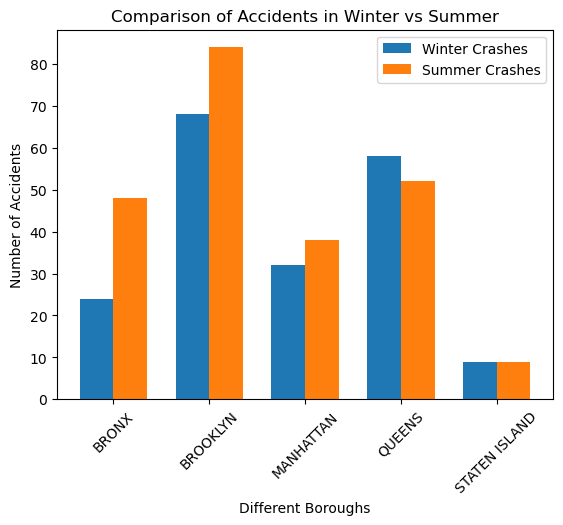

In [51]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Winter Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Summer Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Accidents in Winter vs Summer')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

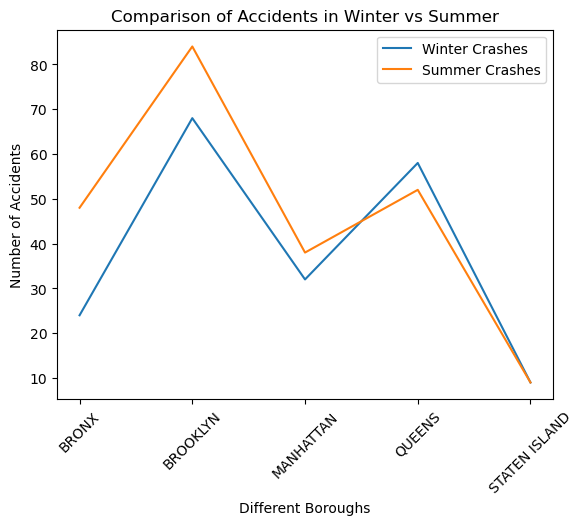

In [52]:
fig, ax = plt.subplots()

ax.plot(borough_counts1.index, borough_counts1.values, label='Winter Crashes')

ax.plot(borough_counts2.index, borough_counts2.values, label='Summer Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Accidents in Winter vs Summer')

plt.xticks(rotation=45)

ax.legend()

plt.show()

In [53]:
fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])
fatality_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
0,2021-04-15,2023-05-15 15:18:00,BROOKLYN,40.620487,-74.029305,1.0,1
1,2021-07-08,2023-05-15 22:03:00,MANHATTAN,40.721474,-73.983830,1.0,2
2,2021-08-27,2023-05-15 09:15:00,MANHATTAN,40.805740,-73.942764,1.0,1
3,2021-09-11,2023-05-15 18:18:00,BROOKLYN,40.684204,-73.968060,1.0,2
4,2021-04-08,2023-05-15 19:55:00,BRONX,40.830307,-73.898730,1.0,1
...,...,...,...,...,...,...,...
751,2016-10-07,2023-05-15 14:47:00,MANHATTAN,0.000000,0.000000,1.0,1
752,2016-10-04,2023-05-15 09:49:00,MANHATTAN,40.719933,-73.978760,1.0,1
753,2016-09-30,2023-05-15 12:16:00,STATEN ISLAND,40.626663,-74.075650,1.0,1
754,2016-09-13,2023-05-15 19:41:00,MANHATTAN,40.810684,-73.954520,1.0,1


In [54]:
morning_rh_df = fatality_df[(fatality_df['CRASH TIME'].dt.hour >= 6) & (fatality_df['CRASH TIME'].dt.hour < 9)]
morning_rh_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
10,2021-08-21,2023-05-15 08:07:00,QUEENS,40.758125,-73.928505,1.0,2
12,2021-04-19,2023-05-15 08:39:00,BROOKLYN,40.614240,-73.988240,1.0,1
16,2022-03-28,2023-05-15 08:25:00,MANHATTAN,40.820435,-73.936230,1.0,5
17,2021-11-17,2023-05-15 06:00:00,QUEENS,40.666750,-73.779945,1.0,1
34,2021-05-24,2023-05-15 06:45:00,QUEENS,40.769283,-73.824450,1.0,2
...,...,...,...,...,...,...,...
715,2017-01-03,2023-05-15 06:46:00,BROOKLYN,40.616043,-73.944840,1.0,2
726,2016-12-09,2023-05-15 08:30:00,BROOKLYN,40.679466,-73.900370,1.0,4
745,2016-09-27,2023-05-15 06:20:00,QUEENS,40.676968,-73.835270,1.0,1
747,2016-09-19,2023-05-15 06:31:00,QUEENS,40.663620,-73.777176,1.0,1


In [55]:
afternoon_rh_df = fatality_df[(fatality_df['CRASH TIME'].dt.hour >= 15) & (fatality_df['CRASH TIME'].dt.hour < 19)]
afternoon_rh_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
0,2021-04-15,2023-05-15 15:18:00,BROOKLYN,40.620487,-74.029305,1.0,1
3,2021-09-11,2023-05-15 18:18:00,BROOKLYN,40.684204,-73.968060,1.0,2
20,2021-11-22,2023-05-15 18:10:00,BROOKLYN,40.654140,-73.887320,1.0,1
32,2021-12-13,2023-05-15 16:52:00,QUEENS,40.710400,-73.866630,1.0,1
40,2020-08-01,2023-05-15 17:16:00,BRONX,40.840508,-73.855150,1.0,2
...,...,...,...,...,...,...,...
736,2016-11-13,2023-05-15 17:15:00,BROOKLYN,40.684147,-73.922966,1.0,0
737,2016-11-21,2023-05-15 17:35:00,BRONX,40.866047,-73.882744,1.0,1
739,2016-10-18,2023-05-15 16:20:00,BRONX,40.836346,-73.852220,1.0,1
742,2016-10-21,2023-05-15 17:30:00,MANHATTAN,40.702663,-74.012886,1.0,1


In [56]:
borough_counts1 = morning_rh_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = afternoon_rh_df['BOROUGH'].value_counts().sort_index()


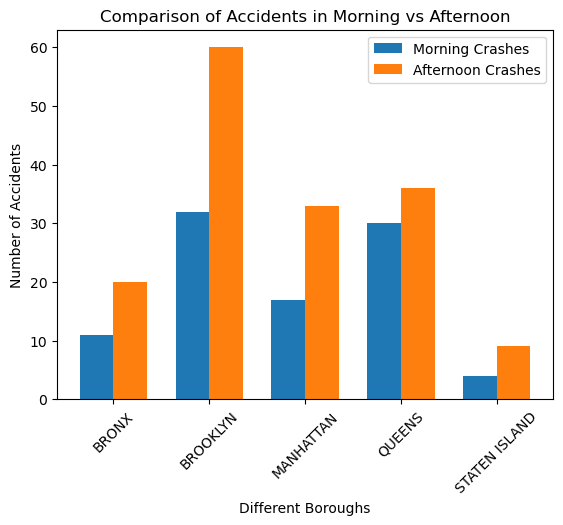

In [57]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Morning Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Accidents in Morning vs Afternoon')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

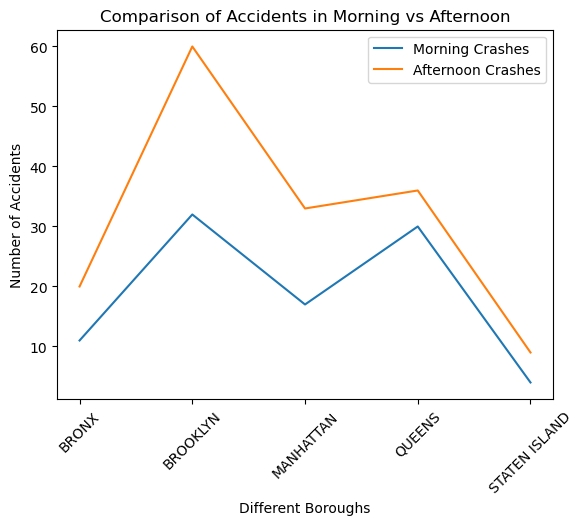

In [58]:
fig, ax = plt.subplots()

ax.plot(borough_counts1.index, borough_counts1.values, label='Morning Crashes')

ax.plot(borough_counts2.index, borough_counts2.values, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Accidents in Morning vs Afternoon')

plt.xticks(rotation=45)

ax.legend()

plt.show()

In [63]:
""" #https://www.census.gov/data/developers/data-sets.html#:~:text=The%20Census%20Bureau's%20Application%20Programming,users%20to%20create%20custom%20queries.
#https://www.census.gov/data/developers/data-sets/popest-popproj/popest.html
#https://api.census.gov/data/2021/pep/population/variables.html


base_url = 'https://api.census.gov/data/2019/pep/population'
get_param = 'POP,NAME'
for_param = 'for=county:*'
in_param = 'in=state:36'
key_param = '7c96416b422b964d28c1c72ecbaef6395f6369dc'  # Census key I made for the project

# Send API request
url = f'{base_url}?get={get_param}&{for_param}&{in_param}&key={key_param}'
response = requests.get(url)
data = response.json()
#print(response.url)

#https://api.census.gov/data/2019/pep/population?get=POP,NAME&for=county:*&in=state:36&key=7c96416b422b964d28c1c72ecbaef6395f6369dc

# Create a dataframe from the API response
columns = data[0]
values = data[1:]
population_df = pd.DataFrame(values, columns=columns)

#https://portal.311.nyc.gov/article/?kanumber=KA-02877  list of all counties and their respective Borough name

county_names = ['Bronx County, New York', 'Kings County, New York', 'New York County, New York', 'Queens County, New York', 'Richmond County, New York']
county_population_df = population_df[population_df['NAME'].isin(county_names)].copy()
county_population_df['Population'] = county_population_df['POP'].astype(int)

new_mapping={
    'Bronx County, New York':'Bronx', 
    'Kings County, New York':'Brooklyn', 
    'New York County, New York':'Manhattan', 
    'Queens County, New York':'Queens', 
    'Richmond County, New York':'Staten Island'
}

county_population_df['NAME'] = county_population_df['NAME'].replace(new_mapping)

county_pop_df = county_population_df[['NAME', 'Population']]

county_pop_df = county_pop_df.sort_values('NAME')

county_pop_df


#############################
bronx_count_norm = bronx_df['BOROUGH'].count() / (county_pop_df.loc[county_pop_df['NAME'] == 'Bronx', 'Population'].values[0] / 10000)
brooklyn_count_norm = brooklyn_df['BOROUGH'].count() / (county_pop_df.loc[county_pop_df['NAME'] == 'Brooklyn', 'Population'].values[0] / 10000)
manhattan_count_norm = manhattan_df['BOROUGH'].count() / (county_pop_df.loc[county_pop_df['NAME'] == 'Manhattan', 'Population'].values[0] / 10000)
queens_count_norm = queens_df['BOROUGH'].count() / (county_pop_df.loc[county_pop_df['NAME'] == 'Queens', 'Population'].values[0] / 10000)
staten_count_norm = staten_df['BOROUGH'].count() / (county_pop_df.loc[county_pop_df['NAME'] == 'Staten Island', 'Population'].values[0] / 10000)


#############################
boroughs_df = [brooklyn_count_norm, bronx_count_norm, manhattan_count_norm, staten_count_norm, queens_count_norm]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_df
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Crashes Per Borough - Adjusted for normalization per 10,000 population")
plt.xlabel("Boroughs")
plt.ylabel("Number of Crashes")
plt.show()
 """

,NAME,Population
23,Bronx,1418207
33,Brooklyn,2559903
6,Manhattan,1628706
4,Queens,2253858
42,Staten Island,476143
